In [1]:
from neural_network import * 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import pickle
logdust_func = open("logdust_3d_func.pkl", "rb")
logdust = pickle.load(logdust_func)

In [2]:
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'axes.titlepad': '15.0'})
rcParams.update({'axes.labelpad': '15.0'})
rcParams.update({'font.size': 20})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'

In [3]:
data = np.load('datasets/dustattenuation_3d_samps.npz')
Xgrid, logdust_grid = data['Xgrid'], data['dustattenuation_grid']
X_train, X_valid, X_test = data['X_train'], data['X_valid'], data['X_test']
Y_train, Y_valid, Y_test = data['Y_train'], data['Y_valid'], data['Y_test']

In [4]:
print(EPOCHS)
print(BATCH_SIZE)
model, train_loss, val_loss = train_NN_model(error=False, num_input=3)

200
50


/home/ava/.local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:4526: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



Start of epo ch 0
Training loss (for one batch) at step 0: 5.1882
Seen so far: 50 samples
Training loss (for one batch) at step 100: 0.8680
Seen so far: 5050 samples
Time taken: 6.43s

Start of epo ch 1
Training loss (for one batch) at step 0: 0.7082
Seen so far: 50 samples
Training loss (for one batch) at step 100: 0.2848
Seen so far: 5050 samples
Time taken: 7.22s

Start of epo ch 2
Training loss (for one batch) at step 0: 0.4018
Seen so far: 50 samples
Training loss (for one batch) at step 100: 0.2553
Seen so far: 5050 samples
Time taken: 6.47s

Start of epo ch 3
Training loss (for one batch) at step 0: 0.3267
Seen so far: 50 samples
Training loss (for one batch) at step 100: 0.3218
Seen so far: 5050 samples
Time taken: 5.64s

Start of epo ch 4
Training loss (for one batch) at step 0: 0.1978
Seen so far: 50 samples
Training loss (for one batch) at step 100: 0.3117
Seen so far: 5050 samples
Time taken: 5.75s

Start of epo ch 5
Training loss (for one batch) at step 0: 0.1804
Seen so 

In [7]:
model = tf.keras.models.load_model('3dmodel_cartesion')
# model.save("gelu_3dmodel_cartesion")

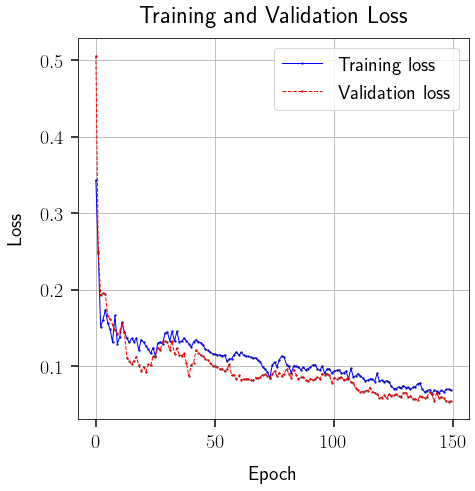

In [5]:
plt.figure(figsize=(7, 7)) 
plt.plot(train_loss, label='Training loss', color='blue', linestyle='-', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.plot(val_loss, label='Validation loss', color='red', linestyle='dashed', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.savefig('6.png', bbox_inches='tight')

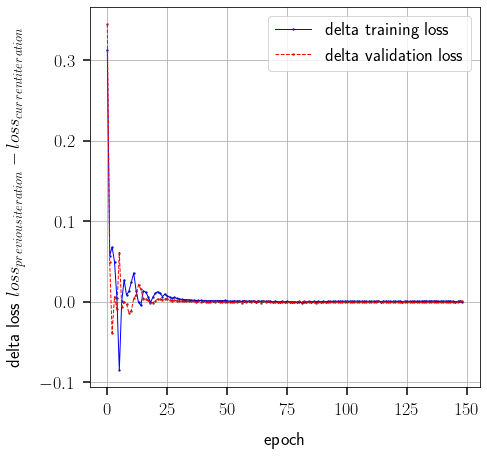

In [13]:
delta_train, delta_valid = [], []
for i in range(1, len(train_loss)):
    delta_train.append(train_loss[i-1] - train_loss[i])
    delta_valid.append(val_loss[i-1] - val_loss[i])
plt.figure(figsize=(7, 7)) 
plt.plot(delta_train, label='delta training loss', color='blue', linestyle='-', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.plot(delta_valid, label='delta validation loss', color='red', linestyle='dashed', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.xlabel('epoch')
plt.ylabel('delta loss ' + r'$loss_{previous iteration} - loss_{current iteration}$')
plt.legend()
plt.grid(True)
plt.savefig('9.png', bbox_inches='tight')

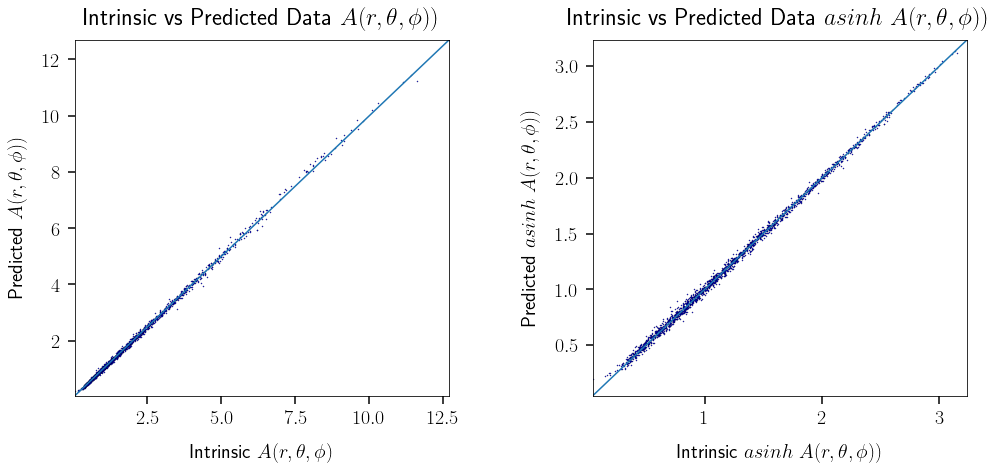

In [8]:
plt.figure(figsize=(15, 8))
#plotting the loss as a function of log A on the x and y axes. This helps to stretch out the axes, since the errors scale proportional to A
pred = get_NN_pred(model, X_test)
pred_asinh = np.arcsinh(pred)
Y_test_asinh = np.arcsinh(Y_test)
plt.subplot(1, 2, 1)
plt.scatter(Y_test, pred, s=1, color='blue', linestyle='-', linewidth = 0.2, marker = 'D', edgecolor='black') 
plt.xlabel("Intrinsic " + r'$A(r, \theta, \phi)$')
plt.ylabel("Predicted " + r'$A(r, \theta, \phi))$')
lims = [min(np.amin(Y_test), np.amin(pred)), max(np.amax(Y_test), np.amax(pred))]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.title('Intrinsic vs Predicted Data ' +  r'$A(r, \theta, \phi))$')
plt.subplot(1, 2, 2)
plt.scatter(Y_test_asinh, pred_asinh, s=1, color='blue', linestyle='-', linewidth = 0.2, marker = 'D', edgecolor='black') 
plt.xlabel("Intrinsic " + r'$asinh$' + ' ' +  r'$A(r, \theta, \phi))$')
plt.ylabel("Predicted " + r'$asinh$' + ' ' +  r'$A(r, \theta, \phi))$')
lims = [min(np.amin(Y_test_asinh), np.amin(pred_asinh)), max(np.amax(Y_test_asinh), np.amax(pred_asinh))]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.title('Intrinsic vs Predicted Data ' +  r'$asinh$' + ' ' +  r'$A(r, \theta, \phi))$')
plt.tight_layout(pad=3.0)
# plt.savefig('plots/typicalintrinsicvspredicted1.png', bbox_inches='tight')
plt.savefig('plots/intrinsic_vs_predicted_asinh_A_3d.png', bbox_inches='tight')

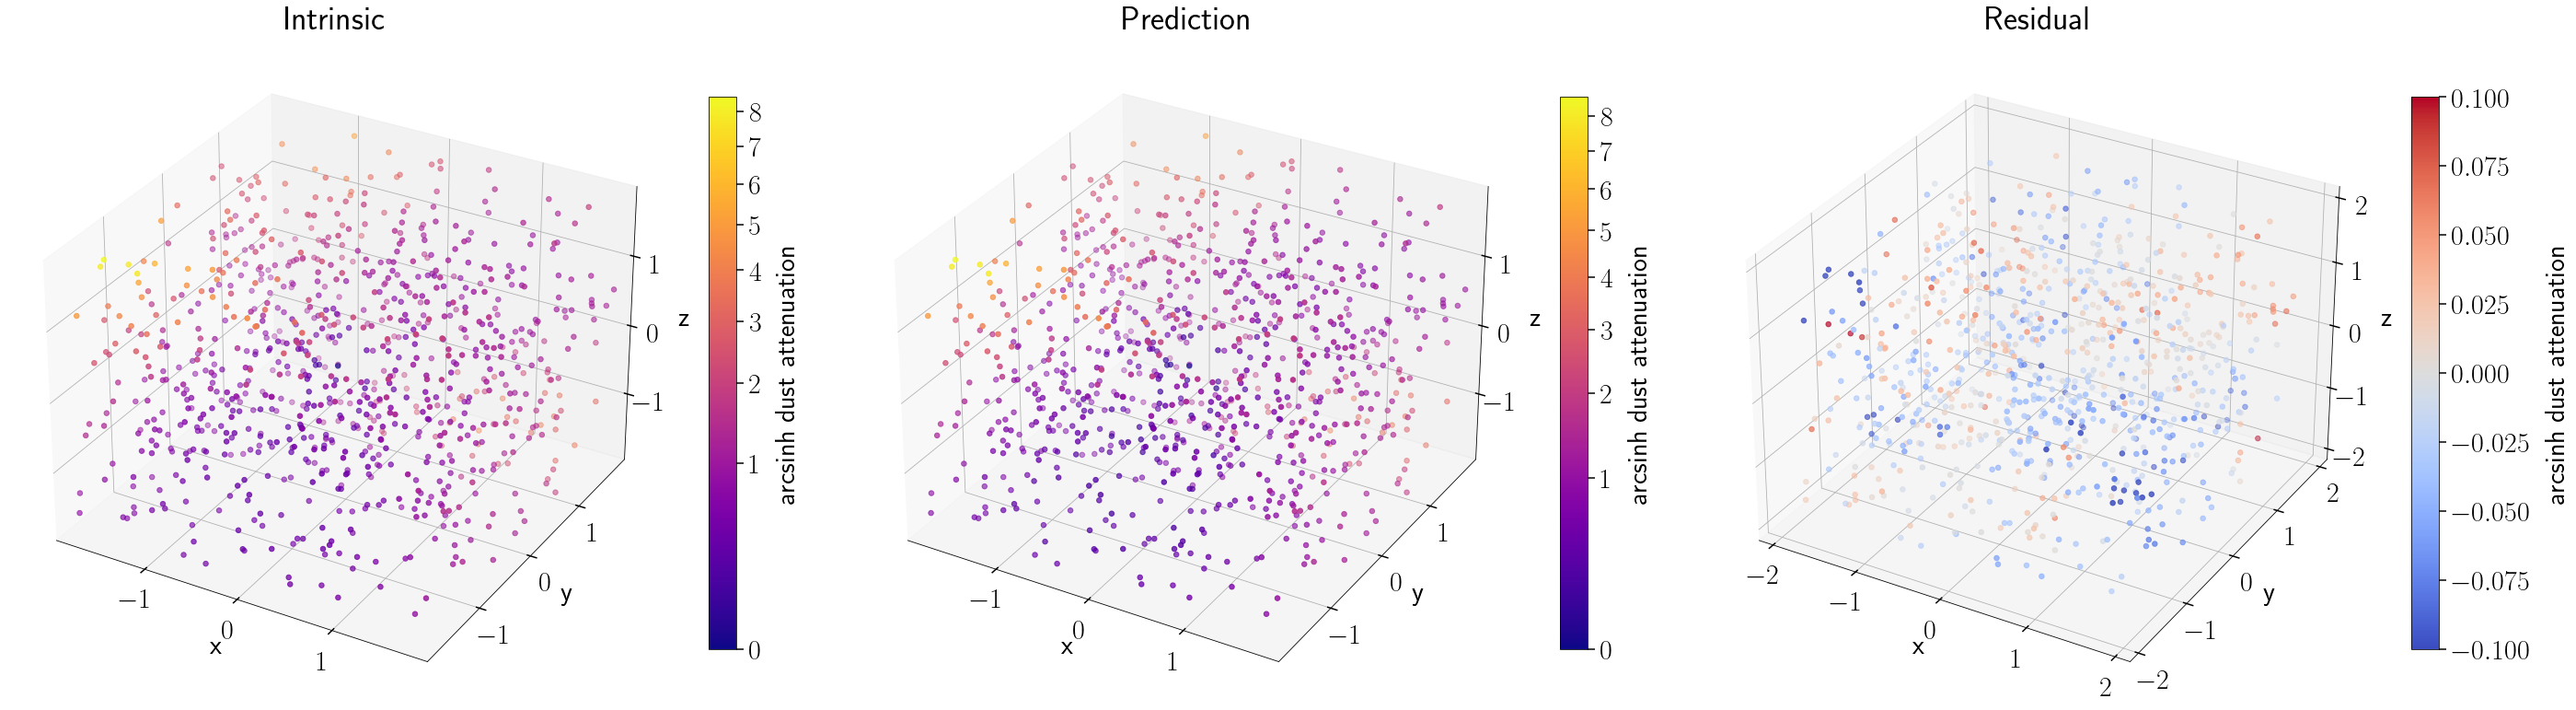

In [9]:
# get all points within range [1.9, 1.9]
ind = [i for i in range(len(X_test)) if -1.9 <= X_test[i][0] <= 1.9 and -1.9 <= X_test[i][1] <= 1.9 and -1.9 <= X_test[i][2] <= 1.9]
Y_test2 = np.asarray([np.asarray(Y_test[i]) for i in ind])
X_test2 = np.asarray([np.asarray(X_test[i]) for i in ind])
pred2 = get_NN_pred(model, X_test2)

fig = plt.figure(figsize=(40, 12))
rcParams.update({'font.size': 30})
ax = fig.add_subplot(131, projection='3d')
im = ax.scatter(X_test2[:, 0], X_test2[:, 1], X_test2[:, 2], c=Y_test2, cmap='plasma', norm=matplotlib.colors.PowerNorm(gamma=0.5), s=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_ylim([-1.9, 1.9])
ax.set_xlim([-1.9, 1.9])
ax.set_zlim([-1.9, 1.9])
cbar = plt.colorbar(im, shrink=0.75)
cbar.set_label('arcsinh dust attenuation')
ax.set_title('Intrinsic')

ax = fig.add_subplot(132, projection='3d')
im = ax.scatter(X_test2[:, 0], X_test2[:, 1], X_test2[:, 2], c=pred2, cmap='plasma', norm=matplotlib.colors.PowerNorm(gamma=0.5), s=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_ylim([-1.9, 1.9])
ax.set_xlim([-1.9, 1.9])
ax.set_zlim([-1.9, 1.9])
cbar = plt.colorbar(im, shrink=0.75)
cbar.set_label('arcsinh dust attenuation')
ax.set_title('Prediction')

ax = fig.add_subplot(133, projection='3d')
im = ax.scatter(X_test2[:, 0], X_test2[:, 1], X_test2[:, 2], c=Y_test2 - pred2, cmap='coolwarm', s=30, vmin=-0.1, vmax=0.1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
cbar = plt.colorbar(im, shrink=0.75)
cbar.set_label('arcsinh dust attenuation')
ax.set_title('Residual')
plt.savefig('plots/test_train_valid_predicted_3d.png', bbox_inches='tight')
plt.tight_layout()

In [10]:
dA_dx = []
dA_dy = []
dA_dz = []

norm = model.get_layer('norm')
dense_1 = model.get_layer('dense_1')
dense_2 = model.get_layer('dense_2')
dense_3 = model.get_layer('dense_3')
pred = model.get_layer('predictions')

for x,y,z in Xgrid:
    xyz = tf.constant([x, y, z])
    with tf.GradientTape() as g:
        g.watch(xyz)
        Y = pred(dense_3(dense_2(dense_1(norm(tf.convert_to_tensor([xyz]))))))
    dA_dxyz = g.gradient(Y, xyz)
    dA_dx.append(dA_dxyz[0])
    dA_dy.append(dA_dxyz[1])
    dA_dz.append(dA_dxyz[2])

In [11]:
r = np.sqrt(np.square(Xgrid[:, 0]) + np.square(Xgrid[:, 1]) + np.square(Xgrid[:, 2]))
x = Xgrid[:, 0]
y = Xgrid[:, 1]
z = Xgrid[:, 2]
x_over_r = np.divide(x, r)
y_over_r = np.divide(y, r)
z_over_r = np.divide(z, r)
dA_dr = np.multiply(dA_dx, x_over_r) + np.multiply(dA_dy, y_over_r) + np.multiply(dA_dz, z_over_r)
intrinsic = [np.exp(logdust(x,y,z)) for x,y,z in Xgrid]

<ipython-input-11-67d4ed5d4d16>:5: RuntimeWarning: invalid value encountered in true_divide
  x_over_r = np.divide(x, r)
<ipython-input-11-67d4ed5d4d16>:6: RuntimeWarning: invalid value encountered in true_divide
  y_over_r = np.divide(y, r)
<ipython-input-11-67d4ed5d4d16>:7: RuntimeWarning: invalid value encountered in true_divide
  z_over_r = np.divide(z, r)


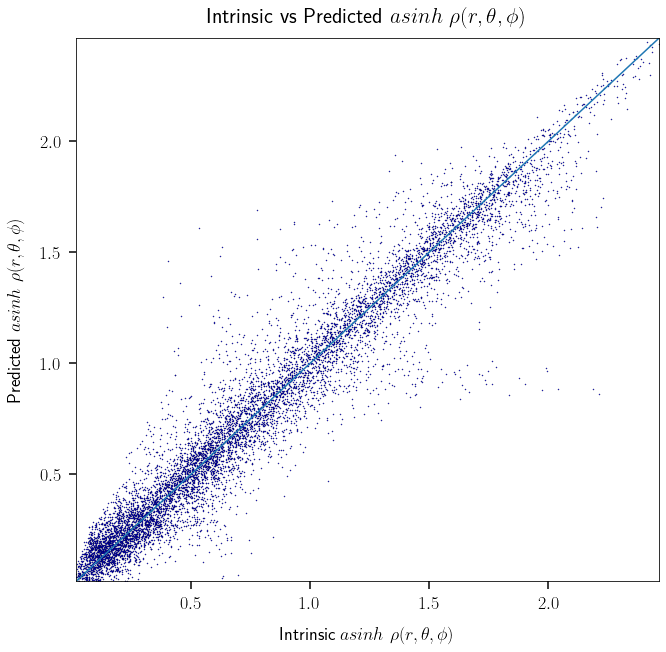

In [12]:
rcParams.update({'font.size': 18})
plt.figure(figsize=(23, 10))
plt.subplot(1, 2, 1)
intrinsic_arcsinh = np.arcsinh(intrinsic)
dA_dr_asinh = np.arcsinh(dA_dr)
plt.scatter(intrinsic_arcsinh, dA_dr_asinh, s=1, color='blue', linestyle='-', linewidth = 0.2, marker = 'D', edgecolor='black') 
plt.xlabel("Intrinsic " + r'$asinh$' + ' ' + r'$\rho(r, \theta, \phi)$')
plt.ylabel("Predicted " + r'$asinh$' + ' ' + r'$\rho(r, \theta, \phi)$')
lims = [min(np.amin(intrinsic_arcsinh), np.amin(dA_dr_asinh)), max(np.amax(intrinsic_arcsinh), np.amax(dA_dr_asinh))]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.title('Intrinsic vs Predicted ' + r'$asinh$' + ' ' + r'$\rho(r, \theta, \phi)$')
plt.savefig('plots/intrinsic_vs_predicted_dust.png', bbox_inches='tight')

In [113]:
ngrid =21
edge = 2.5
dA_dr_log = np.log(dA_dr)

for i in range(21):
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(111, projection='3d')
    end = ngrid*ngrid*(i+1)

    ind = [i for i,val in enumerate(dA_dr[0:end]) if val <= 0 ]
    dustneg = [-1] * len(ind)
    xneg = [Xgrid[:, 0][0:end][i] for i in ind]
    yneg = [Xgrid[:, 1][0:end][i] for i in ind]
    zneg = [Xgrid[:, 2][0:end][i] for i in ind]
    im = ax.scatter(xneg, yneg, zneg, color='#27e838', s=200, vmin=-4, vmax=1.5)
    # im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=dA_dr_log[0:end] - logdust_grid2[0:end], cmap='plasma', s=200, vmin=-4, vmax=1.5)
    im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=dA_dr_log[0:end] - logdust_grid[0:end], cmap='coolwarm', norm=matplotlib.colors.PowerNorm(gamma=0.9), s=200, vmin=-0.6, vmax=0.6)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    cbar = plt.colorbar(im, shrink=0.85)
    cbar.set_label('dust attenuation')
    plt.tight_layout()
    plt.xlim((-edge, edge))
    plt.ylim((-edge, edge))
    plt.savefig('plots/animated3/' + str(i) + '.png', bbox_inches='tight')
    plt.close()

# setting back the intrinsic set
# intrinsic = [np.exp(logdust(x,y)) for x,y in X_test_cart]

<ipython-input-113-27e8e863d5af>:3: RuntimeWarning: invalid value encountered in log
  dA_dr_log = np.log(dA_dr)
<ipython-input-113-27e8e863d5af>:12: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=dA_dr_log[0:end] - logdust_grid2[0:end], cmap='coolwarm', norm=matplotlib.colors.PowerNorm(gamma=0.9), s=200, vmin=-0.6, vmax=0.6)
